# 2-1,张量数据结构

Pytorch的基本数据结构是张量Tensor。张量即多维数组。Pytorch的张量和numpy中的array很类似。

本节我们主要介绍张量的数据类型、张量的维度、张量的尺寸、张量和numpy数组等基本概念。


In [1]:
import torch 
print("torch.__version__="+torch.__version__) 


torch.__version__=2.5.1


### 一，张量的数据类型

**什么是张量 (Tensor)?**

在数学和计算机科学，特别是深度学习领域中，**张量** 是一个广义的概念，可以理解为**多维数组**。 它是标量、向量和矩阵向更高维度的推广。

*   **标量 (Scalar)**:  0维张量，就是一个单独的数字，例如 `5`，`3.14`。
*   **向量 (Vector)**: 1维张量，就是一个数字的有序列表，例如 `[1, 2, 3]`，`[4.0, 5.0, 6.0]`。
*   **矩阵 (Matrix)**: 2维张量，就是一个数字的表格，有行和列，例如
    ```
    [[1, 2],
     [3, 4],
     [5, 6]]
    ```
*   **更高维度的张量**: 3维及以上的张量可以看作是矩阵的堆叠或更高维度的数据组织形式。例如，3维张量可以理解为立方体的数据结构。

**张量的类型**

张量的类型可以从几个不同的角度来分类：

**1. 按数据类型分类 (Data Type):**

这指的是张量中存储的数值的类型。常见的张量数据类型包括：

*   **整数张量 (Integer Tensor):**  存储整数类型的数值，例如：
    *   `int8`, `int16`, `int32`, `int64` (不同位数的整数)
    *   `uint8`, `uint16`, `uint32`, `uint64` (无符号整数)
    *   例子:  用于表示图像的像素索引，类别标签等。

*   **浮点数张量 (Float Tensor):** 存储浮点数（小数）类型的数值，例如：
    *   `float16`, `float32`, `float64` (不同精度的浮点数，也常被称为 `half`, `float`, `double`)
    *   `bfloat16` (Brain Floating Point，用于机器学习中，在精度和范围之间做了平衡)
    *   例子: 用于表示模型的权重、激活值等。

*   **布尔张量 (Boolean Tensor):** 存储布尔值 `True` 或 `False` (或者 `1` 或 `0`)，例如：
    *   `bool`
    *   例子: 用于表示掩码 (mask)，条件判断的结果等。

*   **复数张量 (Complex Tensor):** 存储复数类型的数值，例如：
    *   `complex64`, `complex128`
    *   例子:  在信号处理、物理模拟等领域可能会用到。

*   **字符串张量 (String Tensor):**  存储字符串类型的数值 (在某些框架中支持，但不如数值张量常用)。
    *   `string`
    *   例子: 用于处理文本数据，但通常会先转换为数值表示。

不同框架（如TensorFlow, PyTorch, NumPy）可能会支持略有不同的数据类型，但以上列出的都是非常常见和核心的类型。

**2. 按维度/秩分类 (Rank/Dimension):**

这指的是张量的维度数量，也就是张量轴的数量。

*   **0维张量 (0-D Tensor) / 标量 (Scalar):**  只有一个元素。
    *   例子:  `5`, `3.14`, `True`
    *   形状 (Shape): `()` （空形状）

*   **1维张量 (1-D Tensor) / 向量 (Vector):**  元素排列成一个线性序列。
    *   例子: `[1, 2, 3]`, `[4.0, 5.0, 6.0]`
    *   形状 (Shape): `(n,)`  (其中 `n` 是向量的长度)

*   **2维张量 (2-D Tensor) / 矩阵 (Matrix):**  元素排列成行和列的表格。
    *   例子:
        ```
        [[1, 2],
         [3, 4],
         [5, 6]]
        ```
    *   形状 (Shape): `(m, n)` (其中 `m` 是行数, `n` 是列数)

*   **3维张量 (3-D Tensor):**  可以理解为多个矩阵堆叠在一起，形成一个立方体结构。
    *   例子:  彩色图像 (RGB图像) 可以表示为3维张量，维度通常是 (高度, 宽度, 通道数)，其中通道数可以是3 (红, 绿, 蓝)。
    *   形状 (Shape): `(l, m, n)`

*   **N维张量 (N-D Tensor):**  维度可以继续扩展到任意数量，例如 4维张量, 5维张量等等。
    *   例子:  视频数据可以看作是4维张量 (时间, 高度, 宽度, 通道数)。
    *   形状 (Shape): `(d1, d2, ..., dn)`

**张量和ARRAY (数组) 一致吗?**

在很大程度上，**可以认为张量与ARRAY（数组）在概念和使用上是密切相关的，甚至在很多编程语境下可以互换使用**。

*   **ARRAY (数组)** 通常指的是编程语言中提供的一种数据结构，用于存储同类型元素的多维网格。  在Python中，最常用的数组库是 **NumPy (Numerical Python)**。 NumPy 数组 (ndarray) 提供了高效的多维数组操作。

*   **在NumPy中，ndarray 对象本身就可以被看作是张量的一种实现**。 NumPy 的 `ndarray` 可以表示标量、向量、矩阵以及更高维度的数组，并且支持丰富的数值计算和操作，这些操作也正是张量运算的基础。

*   **深度学习框架如TensorFlow和PyTorch中的 "Tensor" (张量) 概念，很大程度上也是建立在数组 (特别是 NumPy 数组) 的基础之上的。**  这些框架的张量库提供了类似于 NumPy 的数组操作，并在此基础上扩展了自动求导、GPU加速等深度学习所需的功能。  在底层实现中，很多框架的张量数据结构也会利用类似数组的存储方式。

**总结来说：**

*   **概念上：**  张量是一个更广泛的数学和物理概念，而数组是计算机科学中一种具体的数据结构。张量可以用来描述物理量、几何对象等，不仅仅局限于数据存储。
*   **实践中/编程中：**  在数据科学、机器学习和深度学习领域，特别是使用Python和相关库 (NumPy, TensorFlow, PyTorch) 时， "张量" 和 "数组" 往往可以看作是同义词，或者说 "张量" 是 "数组" 的一种更特定、更专业的称呼。 特别是在深度学习框架中，我们操作的 "Tensor" 对象，从数据结构的角度来看，与多维数组是非常相似的。

**为了更清晰地理解，您可以这样记忆：**

*   **ARRAY (数组)  <  张量 (Tensor)  <  更广义的数学和物理概念**

在日常使用中，特别是在深度学习的上下文中，您可以将张量理解为一种**高性能的多维数组**，它不仅存储数据，还支持各种高效的数学运算，这使得它成为构建和训练神经网络的核心数据结构。

希望这个解答能够帮助您理解张量的类型以及它与数组的关系！如果您还有其他问题，欢迎继续提问。

In [5]:
import numpy as np  # 导入NumPy库，通常用于数值计算，尽管这段代码中直接使用的不多
import torch  # 导入PyTorch库，这是深度学习框架，用于创建和操作张量
print("torch.__version__="+torch.__version__) # 打印当前PyTorch的版本号，用于确认安装和版本信息

# 自动推断数据类型 (PyTorch会自动根据输入数据判断张量的数据类型)

i = torch.tensor(1);print(i,i.dtype) # 创建一个整数张量，值为1，并打印张量本身及其数据类型
x = torch.tensor(2.0);print(x,x.dtype) # 创建一个浮点数张量，值为2.0，并打印张量本身及其数据类型
b = torch.tensor(True);print(b,b.dtype) # 创建一个布尔张量，值为True，并打印张量本身及其数据类型


torch.__version__=2.5.1
tensor(1) torch.int64
tensor(2.) torch.float32
tensor(True) torch.bool


In [6]:
# 指定数据类型 (可以在创建张量时明确指定所需的数据类型)

i = torch.tensor(1,dtype = torch.int32);print(i,i.dtype) # 创建一个整数张量，值为1，并指定数据类型为32位整型 (torch.int32)，并打印张量及其数据类型
x = torch.tensor(2.0,dtype = torch.double);print(x,x.dtype) # 创建一个浮点数张量，值为2.0，并指定数据类型为双精度浮点型 (torch.double)，并打印张量及其数据类型


tensor(1, dtype=torch.int32) torch.int32
tensor(2., dtype=torch.float64) torch.float64


In [8]:
# 使用特定类型构造函数 (PyTorch提供了一些特定类型的构造函数来创建张量)

i = torch.IntTensor(1);print(i,i.dtype) # 使用IntTensor构造函数创建一个整数张量，值为1，并打印张量及其数据类型 (注意：IntTensor默认数据类型是 torch.int32)
x = torch.Tensor(np.array(2.0));print(x,x.dtype) # 使用Tensor构造函数并传入NumPy数组来创建张量，值为2.0，并打印张量及其数据类型 (注意：Tensor默认数据类型是 torch.float32，等价于torch.FloatTensor) #等价于torch.FloatTensor 的注释已经保留
b = torch.BoolTensor(np.array([1,0,2,0])); print(b,b.dtype) # 使用BoolTensor构造函数并传入NumPy数组来创建布尔张量，输入数组的非零元素会被视为True，零元素为False，并打印张量及其数据类型

tensor([0], dtype=torch.int32) torch.int32
tensor(2.) torch.float32
tensor([ True, False,  True, False]) torch.bool


In [9]:
# 不同类型进行转换 (PyTorch提供多种方法来转换张量的数据类型)

i = torch.tensor(1); print(i,i.dtype) # 创建一个整数张量，值为1，并打印张量及其数据类型 (默认类型是 torch.int64 或 torch.int，取决于系统默认整数类型)
x = i.float(); print(x,x.dtype) # 调用 .float() 方法将整数张量 i 转换为浮点数类型 (torch.float32)，并将结果赋值给 x，然后打印 x 及其数据类型 #调用 float方法转换成浮点类型的注释已经保留
y = i.type(torch.float); print(y,y.dtype) # 使用 .type() 函数将整数张量 i 转换为浮点数类型 (torch.float32)，并将结果赋值给 y，然后打印 y 及其数据类型 #使用type函数转换成浮点类型的注释已经保留
z = i.type_as(x);print(z,z.dtype) # 使用 .type_as() 方法将整数张量 i 转换为与张量 x 相同的数据类型 (torch.float32，因为 x 是 float 类型)，并将结果赋值给 z，然后打印 z 及其数据类型 #使用type_as方法转换成某个Tensor相同类型的注释已经保留

tensor(1) torch.int64
tensor(1.) torch.float32
tensor(1.) torch.float32
tensor(1.) torch.float32


### 二，张量的维度

**张量的维度 (Dimension/Rank)**

在张量 (Tensor) 的概念中，**维度 (Dimension)**，也称为**秩 (Rank)** 或 **轴 (Axes)**，指的是**描述张量所需的轴的数量**。 可以把它想象成访问张量中特定元素所需的索引数量。 从另一个角度看，维度也代表了张量的**嵌套层级**。

*   **0维张量 (0-D Tensor)**：也称为**标量 (Scalar)**。 它只是一个单独的数值，没有轴。 例如，一个数字 `5`。
*   **1维张量 (1-D Tensor)**：也称为**向量 (Vector)**。 它是一个数字的线性数组，只有一个轴。 例如，`[1, 2, 3]`。
*   **2维张量 (2-D Tensor)**：也称为**矩阵 (Matrix)**。 它是一个数字的表格，有行和列，有两个轴。 例如，`[[1, 2], [3, 4]]`。
*   **3维张量 (3-D Tensor)**：可以想象成多个矩阵堆叠在一起，形成一个立方体结构，有三个轴。 例如，可以表示彩色图像 (高度、宽度、颜色通道)。
*   **N维张量 (N-D Tensor)**：可以扩展到任意维度，维度越多，张量可以表示的数据结构就越复杂。 例如，视频数据可以看作是4维张量 (时间、高度、宽度、颜色通道)。


In [10]:
# 标量 (Scalar) - 0维张量
scalar = torch.tensor(True) # 创建一个标量张量，值为布尔值 True
print("标量张量:")
print(scalar) # 打印标量张量的内容
print("标量张量的维度:")
print(scalar.dim())  # 使用 .dim() 方法获取张量的维度，标量是0维张量，所以输出 0
print("-" * 30) # 分隔线，用于区分不同类型的张量输出

标量张量:
tensor(True)
标量张量的维度:
0
------------------------------


In [11]:
# 向量 (Vector) - 1维张量
vector = torch.tensor([1.0, 2.0, 3.0, 4.0]) # 创建一个向量张量，包含四个浮点数值
print("向量张量:")
print(vector) # 打印向量张量的内容
print("向量张量的维度:")
print(vector.dim()) # 向量是1维张量，所以输出 1
print("-" * 30) # 分隔线

向量张量:
tensor([1., 2., 3., 4.])
向量张量的维度:
1
------------------------------


In [12]:
# 矩阵 (Matrix) - 2维张量
matrix = torch.tensor([[1.0, 2.0], [3.0, 4.0]]) # 创建一个矩阵张量，2行2列
print("矩阵张量:")
print(matrix) # 打印矩阵张量的内容
print("矩阵张量的维度:")
print(matrix.dim()) # 矩阵是2维张量，所以输出 2
print("-" * 30) # 分隔线

矩阵张量:
tensor([[1., 2.],
        [3., 4.]])
矩阵张量的维度:
2
------------------------------


In [13]:
# 3维张量 (3-D Tensor)
tensor3 = torch.tensor([
    [[1.0, 2.0], [3.0, 4.0]],  # 第一个矩阵 (沿维度0的第一个元素)
    [[5.0, 6.0], [7.0, 8.0]]   # 第二个矩阵 (沿维度0的第二个元素)
])  # 创建一个3维张量，可以看作是包含两个矩阵的数组
print("3维张量:")
print(tensor3) # 打印3维张量的内容
print("3维张量的维度:")
print(tensor3.dim()) # 3维张量，所以输出 3
print("-" * 30) # 分隔线

3维张量:
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3维张量的维度:
3
------------------------------


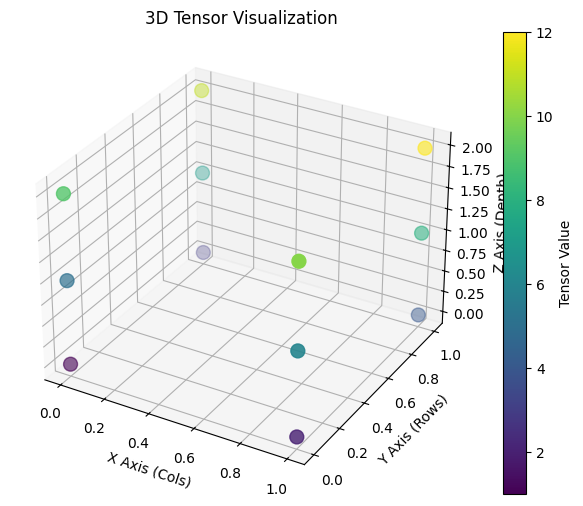

In [17]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1. 创建一个三维张量
tensor3d = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
], dtype=torch.int32) #  显式指定数据类型为 int32，更清晰

# 2. 获取张量的形状
shape = tensor3d.shape
depth, rows, cols = shape # 分别对应 z, y, x 轴

# 3. 创建三维坐标和值列表
x_coords = []
y_coords = []
z_coords = []
values = []

for i in range(depth):      # 遍历深度 (z轴)
    for j in range(rows):   # 遍历行 (y轴)
        for k in range(cols): # 遍历列 (x轴)
            x_coords.append(k) # 列索引作为 x 坐标
            y_coords.append(j) # 行索引作为 y 坐标
            z_coords.append(i) # 深度索引作为 z 坐标
            values.append(tensor3d[i, j, k].item()) # 获取张量值并添加到列表

# 4. 创建 Matplotlib 3D 图形
fig = plt.figure(figsize=(8, 6)) # 创建 figure 对象，可以设置图像大小
ax = fig.add_subplot(111, projection='3d') # 添加 3D 坐标轴子图

# 5. 绘制散点图，颜色映射到张量的值
# 使用 'viridis' 色图，可以根据需要选择其他色图 (例如 'plasma', 'magma', 'inferno', 'coolwarm' 等)
scatter = ax.scatter(x_coords, y_coords, z_coords, c=values, cmap='viridis', marker='o', s=100)
# c=values:  颜色由张量的值决定
# cmap='viridis': 使用 'viridis' 色图 (颜色映射)
# marker='o':  点的形状为圆形
# s=100:  点的大小

# 6. 设置坐标轴标签
ax.set_xlabel('X Axis (Cols)') #  x 轴标签，对应列索引
ax.set_ylabel('Y Axis (Rows)') #  y 轴标签，对应行索引
ax.set_zlabel('Z Axis (Depth)') #  z 轴标签，对应深度索引

# 7. 添加颜色colorbar，显示颜色和值的对应关系
fig.colorbar(scatter, ax=ax, label='Tensor Value') # 添加颜色刻度条，并设置标签

# 8. 设置图形标题
plt.title('3D Tensor Visualization') #  设置图形标题

# 9. 显示图形
plt.show() # 显示绘制的图形

In [14]:
# 4维张量 (4-D Tensor)
tensor4 = torch.tensor([
    [  # 第一个 3维张量 (沿维度0的第一个元素)
        [[1.0, 1.0], [2.0, 2.0]], # 第一个矩阵 (沿维度1的第一个元素)
        [[3.0, 3.0], [4.0, 4.0]]  # 第二个矩阵 (沿维度1的第二个元素)
    ], # 第一个 3维张量 结束
    [  # 第二个 3维张量 (沿维度0的第二个元素)
        [[5.0, 5.0], [6.0, 6.0]], # 第一个矩阵 (沿维度1的第一个元素)
        [[7.0, 7.0], [8.0, 8.0]]  # 第二个矩阵 (沿维度1的第二个元素)
    ] # 第二个 3维张量 结束
])  # 创建一个4维张量，可以看作是包含两个 3维张量的数组
print("4维张量:")
print(tensor4) # 打印4维张量的内容
print("4维张量的维度:")
print(tensor4.dim()) # 4维张量，所以输出 4
print("-" * 30) # 分隔线

4维张量:
tensor([[[[1., 1.],
          [2., 2.]],

         [[3., 3.],
          [4., 4.]]],


        [[[5., 5.],
          [6., 6.]],

         [[7., 7.],
          [8., 8.]]]])
4维张量的维度:
4
------------------------------


### 三，张量的尺寸

## 张量的尺寸 (Size)

在张量 (Tensor) 的概念中，**尺寸 (Size)**，也常被称为 **形状 (Shape)**，是描述张量结构的关键属性。它定义了张量在**每个维度 (Dimension)** 上的**长度或元素数量**。 理解张量的尺寸对于进行张量运算和数据处理至关重要。

### 1. 什么是张量的尺寸 (Shape)?

*   **定义:** 张量的尺寸 (Shape)  是一个描述张量**维度**和**每个维度大小**的元组 (Tuple)。 它告诉我们张量在每个轴上拥有多少个元素。
*   **重要性:**
    *   **数据结构描述:**  尺寸 (Shape)  完全定义了张量的数据组织形式。 了解 Shape 可以帮助我们想象张量是标量、向量、矩阵还是更高维度的结构。
    *   **运算兼容性:**  在进行张量运算 (如加法、矩阵乘法、广播等) 时，操作数张量的 Shape 必须满足特定的兼容性条件。 Shape 决定了运算是否有效以及如何执行。
    *   **内存分配:**  张量的 Shape 决定了它在内存中需要分配的空间大小。

### 2. 尺寸的表示方法

张量的尺寸 (Shape)  通常用 **元组 (Tuple)** 来表示，元组中的每个元素代表张量在该维度上的大小。

*   **标量 (Scalar, 0 维张量):**  形状表示为 **空元组 `()`**。  因为它没有维度，所以形状信息为空。
*   **向量 (Vector, 1 维张量):** 形状表示为 **`(n,)`**，其中 `n` 是向量的长度，即向量包含的元素数量。 注意，这里是一个单元素元组，为了区分，通常会在后面加一个逗号 `,`。
*   **矩阵 (Matrix, 2 维张量):** 形状表示为 **`(m, n)`**，其中 `m` 是矩阵的行数，`n` 是矩阵的列数。
*   **N 维张量 (N-D Tensor):** 形状表示为 **`(d1, d2, ..., dn)`**，其中 `di` 表示第 `i` 个维度的大小。

### 3. 如何获取张量的尺寸 (Shape)?

在 PyTorch 和 NumPy 中，您可以使用张量对象的 `.shape` 属性来获取其尺寸。

#### 3.1. PyTorch 中获取张量尺寸

```python
import torch

# 创建不同维度的张量
scalar_tensor = torch.tensor(10)
vector_tensor = torch.tensor([1, 2, 3, 4])
matrix_tensor = torch.tensor([[1, 2], [3, 4], [5, 6]])
tensor3d = torch.randn(2, 3, 4) # 创建一个 3 维张量，形状为 (2, 3, 4)

# 获取并打印张量的形状
print("标量张量的形状 (Shape):", scalar_tensor.shape)
print("向量张量的形状 (Shape):", vector_tensor.shape)
print("矩阵张量的形状 (Shape):", matrix_tensor.shape)
print("3维张量的形状 (Shape):", tensor3d.shape)

In [18]:
# 创建标量张量 (0维张量)
scalar = torch.tensor(True) # 创建一个布尔标量张量，值为 True
print("标量张量:")
print(scalar)
print("使用 .size() 获取标量张量的尺寸:", scalar.size()) # 使用 .size() 方法获取张量的尺寸 (Size)，标量返回空尺寸
print("使用 .shape 获取标量张量的形状:", scalar.shape) # 使用 .shape 属性获取张量的形状 (Shape)，标量返回空形状
print("-" * 30) # 分隔线

标量张量:
tensor(True)
使用 .size() 获取标量张量的尺寸: torch.Size([])
使用 .shape 获取标量张量的形状: torch.Size([])
------------------------------


In [19]:
# 创建向量张量 (1维张量)
vector = torch.tensor([1.0, 2.0, 3.0, 4.0]) # 创建一个包含4个浮点数的向量张量
print("向量张量:")
print(vector)
print("使用 .size() 获取向量张量的尺寸:", vector.size()) # 对于向量，.size() 返回包含一个元素的尺寸元组 (长度)
print("使用 .shape 获取向量张量的形状:", vector.shape) # .shape 属性返回的结果与 .size() 相同
print("-" * 30) # 分隔线

向量张量:
tensor([1., 2., 3., 4.])
使用 .size() 获取向量张量的尺寸: torch.Size([4])
使用 .shape 获取向量张量的形状: torch.Size([4])
------------------------------


In [20]:
# 创建矩阵张量 (2维张量)
matrix = torch.tensor([[1.0, 2.0], [3.0, 4.0]]) # 创建一个 2x2 的矩阵张量
print("矩阵张量:")
print(matrix)
print("使用 .size() 获取矩阵张量的尺寸:", matrix.size()) # 对于矩阵，.size() 返回包含两个元素的尺寸元组 (行数, 列数)
print("使用 .shape 获取矩阵张量的形状:", matrix.shape) # .shape 属性返回的结果与 .size() 相同
print("-" * 30) # 分隔线

矩阵张量:
tensor([[1., 2.],
        [3., 4.]])
使用 .size() 获取矩阵张量的尺寸: torch.Size([2, 2])
使用 .shape 获取矩阵张量的形状: torch.Size([2, 2])
------------------------------


In [14]:
# 使用view可以改变张量尺寸

vector = torch.arange(0,12)
print(vector)
print(vector.shape)

matrix34 = vector.view(3,4)
print(matrix34)
print(matrix34.shape)

matrix43 = vector.view(4,-1) #-1表示该位置长度由程序自动推断
print(matrix43)
print(matrix43.shape)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


In [21]:
print("\n---  使用 view() 方法改变张量尺寸  ---") # 标题，标识以下代码块是关于 view() 操作的

# 使用 view() 可以改变张量尺寸 (Reshape)

vector = torch.arange(0, 12) # 创建一个 1维张量，包含从 0 到 11 的整数 (共 12 个元素)
print("原始向量张量:")
print(vector)
print("原始向量张量的形状:", vector.shape) # 打印原始向量的形状 (1维，长度为12)
print("-" * 30) # 分隔线

matrix34 = vector.view(3, 4) # 使用 .view() 方法将 1维向量 Reshape 成 3x4 的矩阵
print("使用 view(3, 4) reshape 后的矩阵 (3x4):")
print(matrix34) # 打印 Reshape 后的矩阵
print("Reshape 后矩阵的形状:", matrix34.shape) # 打印 Reshape 后矩阵的形状 (2维，3行4列)
print("-" * 30) # 分隔线

matrix43 = vector.view(4, -1) # 使用 .view()，其中 -1 表示该位置的长度由程序自动推断，这里根据总元素数和第一维 (4) 自动计算出第二维为 3
print("使用 view(4, -1) reshape 后的矩阵 (4x3，-1 自动推断维度):")
print(matrix43) # 打印 Reshape 后的矩阵
print("Reshape 后矩阵的形状:", matrix43.shape) # 打印 Reshape 后矩阵的形状 (2维，4行3列)
print("-" * 30) # 分隔线


---  使用 view() 方法改变张量尺寸  ---
原始向量张量:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
原始向量张量的形状: torch.Size([12])
------------------------------
使用 view(3, 4) reshape 后的矩阵 (3x4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
Reshape 后矩阵的形状: torch.Size([3, 4])
------------------------------
使用 view(4, -1) reshape 后的矩阵 (4x3，-1 自动推断维度):
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
Reshape 后矩阵的形状: torch.Size([4, 3])
------------------------------


In [23]:
# 有些操作会让张量存储结构扭曲 (become non-contiguous)，直接使用 view() 会失败，需要用 reshape() 方法

matrix26 = torch.arange(0, 12).view(2, 6) # 先创建一个 2x6 的矩阵
print("初始矩阵 (2x6):")
print(matrix26)
print("初始矩阵的形状:", matrix26.shape)
print("-" * 30) # 分隔线

# 转置操作 .t()  会让张量的存储结构扭曲 (不再是 contiguous)
matrix62 = matrix26.t() # 对矩阵进行转置操作，得到 6x2 的矩阵
print("转置后的矩阵 (6x2):")
print(matrix62)
print("转置后矩阵的形状:", matrix62.shape)
print("转置后矩阵在内存中是否连续存储 (is_contiguous()):", matrix62.is_contiguous()) # 使用 .is_contiguous() 检查转置后的矩阵在内存中是否连续存储，结果为 False
print("-" * 30) # 分隔线


# 直接使用 view() 方法 reshape 会失败，因为存储结构已扭曲 (non-contiguous)
# matrix34_view_fail = matrix62.view(3, 4) # 这行代码会报错! 取消注释会看到 RuntimeError

# 使用 reshape() 方法可以成功 reshape，reshape() 会处理存储结构扭曲的情况
matrix34_reshape_success = matrix62.reshape(3, 4) # 使用 .reshape() 方法进行 reshape，可以成功将扭曲存储结构的矩阵 reshape 成 3x4
print("使用 reshape(3, 4) reshape 后的矩阵 (3x4，使用 reshape 成功处理扭曲结构):")
print(matrix34_reshape_success) # 打印 Reshape 后的矩阵
print("Reshape 后矩阵的形状:", matrix34_reshape_success.shape) # 打印 Reshape 后矩阵的形状 (2维，3行4列)
print("-" * 30) # 分隔线

# reshape() 等价于先调用 .contiguous()  再调用 .view()
matrix34_contiguous_view = matrix62.contiguous().view(3, 4) # 先调用 .contiguous() 使张量存储结构连续，然后再使用 .view() 进行 reshape
print("使用 contiguous().view(3, 4) reshape 后的矩阵 (3x4，等价于 reshape()):")
print(matrix34_contiguous_view) # 打印 Reshape 后的矩阵
print("Reshape 后矩阵的形状:", matrix34_contiguous_view.shape) # 打印 Reshape 后矩阵的形状 (2维，3行4列)
print("-" * 30) # 分隔线

初始矩阵 (2x6):
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
初始矩阵的形状: torch.Size([2, 6])
------------------------------
转置后的矩阵 (6x2):
tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
转置后矩阵的形状: torch.Size([6, 2])
转置后矩阵在内存中是否连续存储 (is_contiguous()): False
------------------------------
使用 reshape(3, 4) reshape 后的矩阵 (3x4，使用 reshape 成功处理扭曲结构):
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
Reshape 后矩阵的形状: torch.Size([3, 4])
------------------------------
使用 contiguous().view(3, 4) reshape 后的矩阵 (3x4，等价于 reshape()):
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
Reshape 后矩阵的形状: torch.Size([3, 4])
------------------------------


### 四，张量和numpy数组


在深度学习和数值计算中，PyTorch 的 **张量 (Tensor)** 和 NumPy 的 **数组 (ndarray)** 是两种核心的数据结构。 它们之间存在紧密的联系，可以方便地进行互相转换，并且在某些情况下会共享数据内存。 理解它们之间的关系对于高效地进行数据处理至关重要。

### 1. 张量与 NumPy 数组之间的转换

PyTorch 提供了便捷的方法，可以将张量 (Tensor) 转换为 NumPy 数组 (ndarray)，反之亦然。

#### 1.1. 从张量 (Tensor) 转换为 NumPy 数组 (ndarray) - `.numpy()` 方法

*   **方法:**  使用张量对象的 `.numpy()` 方法可以将 PyTorch 张量转换为 NumPy 数组。

*   **代码示例 (PyTorch):**

    ```python
    import torch
    import numpy as np

    tensor = torch.tensor([[1, 2], [3, 4]])
    print("原始 Tensor:")
    print(tensor)

    numpy_array = tensor.numpy()
    print("\n转换后的 NumPy 数组:")
    print(numpy_array)

    print("\nNumPy 数组类型:", type(numpy_array))
    ```

    **代码输出：**

    ```
    原始 Tensor:
    tensor([[1, 2],
            [3, 4]])

    转换后的 NumPy 数组:
    [[1 2]
     [3 4]]

    NumPy 数组类型: <class 'numpy.ndarray'>
    ```

#### 1.2. 从 NumPy 数组 (ndarray) 转换为 张量 (Tensor) - `torch.from_numpy()`

*   **方法:** 使用 `torch.from_numpy()` 函数可以将 NumPy 数组转换为 PyTorch 张量。

*   **代码示例 (PyTorch):**

    ```python
    import torch
    import numpy as np

    numpy_array = np.array([[5, 6], [7, 8]])
    print("原始 NumPy 数组:")
    print(numpy_array)

    tensor = torch.from_numpy(numpy_array)
    print("\n转换后的 Tensor:")
    print(tensor)

    print("\nTensor 类型:", type(tensor))
    ```

    **代码输出：**

    ```
    原始 NumPy 数组:
    [[5 6]
     [7 8]]

    转换后的 Tensor:
    tensor([[5, 6],
            [7, 8]])

    Tensor 类型: <class 'torch.Tensor'>
    ```

### 2. 内存共享 - 关联的张量和数组

**关键特性:**  使用 `.numpy()` 和 `torch.from_numpy()` 进行转换时，得到的 **Tensor 和 NumPy 数组会共享底层的数据内存**。 这意味着它们实际上指向相同的内存区域。

*   **后果:**  **如果修改了其中一个 (Tensor 或 NumPy 数组) 的数据，另一个的值也会同步发生改变**。

*   **代码示例 (内存共享演示):**

    ```python
    import torch
    import numpy as np

    tensor = torch.tensor([1, 2, 3])
    numpy_array = tensor.numpy()

    print("初始 Tensor:", tensor)
    print("初始 NumPy 数组:", numpy_array)

    # 修改 NumPy 数组的值
    numpy_array[0] = 100
    print("\n修改 NumPy 数组后...")
    print("修改后的 NumPy 数组:", numpy_array)
    print("对应的 Tensor:", tensor) # Tensor 的值也发生了改变

    # 修改 Tensor 的值
    tensor[1] = 200
    print("\n修改 Tensor 后...")
    print("修改后的 Tensor:", tensor)
    print("对应的 NumPy 数组:", numpy_array) # NumPy 数组的值也发生了改变
    ```

    **代码输出：**

    ```
    初始 Tensor: tensor([1, 2, 3])
    初始 NumPy 数组: [1 2 3]

    修改 NumPy 数组后...
    修改后的 NumPy 数组: [100   2   3]
    对应的 Tensor: tensor([100,   2,   3])

    修改 Tensor 后...
    修改后的 Tensor: tensor([100, 200,   3])
    对应的 NumPy 数组: [100 200   3]
    ```

    **解释:**  从输出结果可以看出，当修改 NumPy 数组的元素后，对应的 Tensor 的值也立即改变；反之亦然。 这证明了它们之间共享数据内存。

### 3. 中断数据关联 - 克隆 (Clone) 张量

*   **需求:**  在某些情况下，我们可能需要创建一个与现有张量内容相同的新张量，但 **不希望它们之间共享数据内存**。  这时可以使用张量的 `.clone()` 方法。

*   **方法:**  `.clone()` 方法会创建一个**新的张量**，并将原始张量的数据复制到新的张量中。  克隆后的张量与原始张量不再共享内存，修改其中一个不会影响另一个。

*   **代码示例 (使用 `.clone()` 中断关联):**

    ```python
    import torch
    import numpy as np

    tensor_original = torch.tensor([1, 2, 3])
    numpy_array_shared = tensor_original.numpy() # 共享内存的 NumPy 数组
    tensor_clone = tensor_original.clone()      # 克隆出的 Tensor，不共享内存

    print("原始 Tensor:", tensor_original)
    print("共享内存的 NumPy 数组:", numpy_array_shared)
    print("克隆的 Tensor:", tensor_clone)

    # 修改克隆的 Tensor
    tensor_clone[0] = 500
    print("\n修改克隆的 Tensor 后...")
    print("克隆的 Tensor (已修改):", tensor_clone)
    print("原始 Tensor (未修改):", tensor_original) # 原始 Tensor 值保持不变
    print("共享内存的 NumPy 数组 (未修改):", numpy_array_shared) # 共享内存的 NumPy 数组仍然反映原始 Tensor 的值 (未被克隆操作影响)

    # 修改共享内存的 NumPy 数组
    numpy_array_shared[1] = 600
    print("\n修改共享内存的 NumPy 数组后...")
    print("共享内存的 NumPy 数组 (已修改):", numpy_array_shared)
    print("原始 Tensor (同步修改):", tensor_original) # 原始 Tensor 同步被修改
    print("克隆的 Tensor (未修改):", tensor_clone) # 克隆的 Tensor 仍然不受影响
    ```

    **代码输出：**

    ```
    原始 Tensor: tensor([1, 2, 3])
    共享内存的 NumPy 数组: [1 2 3]
    克隆的 Tensor: tensor([1, 2, 3])

    修改克隆的 Tensor 后...
    克隆的 Tensor (已修改): tensor([500,   2,   3])
    原始 Tensor (未修改): tensor([1, 2, 3])
    共享内存的 NumPy 数组 (未修改): [1 2 3]

    修改共享内存的 NumPy 数组后...
    共享内存的 NumPy 数组 (已修改): [600   2   3]
    原始 Tensor (同步修改): tensor([  1, 600,   3])
    克隆的 Tensor (未修改): tensor([500,   2,   3])
    ```

    **解释:**  从输出结果可以看到：

    *   修改 `tensor_clone` (克隆的 Tensor) 不会影响原始的 `tensor_original` 和共享内存的 `numpy_array_shared`。
    *   修改 `numpy_array_shared` (共享内存的 NumPy 数组) 会同步修改原始的 `tensor_original`，但不会影响克隆的 `tensor_clone`。

### 4. 从标量张量获取 Python 数值 - `.item()` 方法

*   **方法:**  对于只包含一个元素的 **标量张量 (0 维张量)**，可以使用 `.item()` 方法将其转换为对应的 Python 数值 (例如，int, float, bool)。

*   **适用场景:**  当您需要从标量张量中提取数值，并进行 Python 原生的数值运算或输出时，`.item()` 非常有用。

*   **代码示例 (使用 `.item()` 获取 Python 数值):**

    ```python
    import torch

    scalar_tensor = torch.tensor(3.14159) # 创建一个标量浮点数张量
    print("标量 Tensor:", scalar_tensor)
    print("标量 Tensor 的形状:", scalar_tensor.shape) # 标量张量的形状为空

    python_scalar = scalar_tensor.item()
    print("\n转换为 Python 数值:", python_scalar)
    print("Python 数值类型:", type(python_scalar))
    ```

    **代码输出：**

    ```
    标量 Tensor: tensor(3.1416)
    标量 Tensor 的形状: torch.Size([])

    转换为 Python 数值: 3.14159
    Python 数值类型: <class 'float'>
    ```

    **注意:**  `.item()` 方法只能用于 **标量张量** (即形状为空 `()` 或 `torch.Size([])` 的张量)。  如果张量包含多个元素，使用 `.item()` 会报错。

### 5. 从张量获取 Python 数值列表 - `.tolist()` 方法

*   **方法:**  可以使用张量的 `.tolist()` 方法将其转换为对应的 Python 数值列表 (List)。 对于多维张量，`.tolist()` 会递归地转换为嵌套的 Python 列表。

*   **适用场景:**  当您需要将张量数据转换为 Python 原生的列表结构，以便进行 Python 列表操作或与其他 Python 库 (例如 JSON, CSV 等) 交互时，`.tolist()` 非常有用。

*   **代码示例 (使用 `.tolist()` 获取 Python 列表):**

    ```python
    import torch

    vector_tensor = torch.tensor([10, 20, 30]) # 1维向量
    print("向量 Tensor:", vector_tensor)

    python_list_vector = vector_tensor.tolist()
    print("\n转换为 Python 列表 (向量):", python_list_vector)
    print("Python 列表类型:", type(python_list_vector))

    matrix_tensor = torch.tensor([[1, 2], [3, 4]]) # 2维矩阵
    print("\n矩阵 Tensor:")
    print(matrix_tensor)

    python_list_matrix = matrix_tensor.tolist()
    print("\n转换为 Python 列表 (矩阵):", python_list_matrix) # 转换为嵌套列表
    print("Python 列表类型:", type(python_list_matrix))
    ```

    **代码输出：**

    ```
    向量 Tensor: tensor([10, 20, 30])

    转换为 Python 列表 (向量): [10, 20, 30]
    Python 列表类型: <class 'list'>

    矩阵 Tensor:
    tensor([[1, 2],
            [3, 4]])

    转换为 Python 列表 (矩阵): [[1, 2], [3, 4]]
    Python 列表类型: <class 'list'>
    ```

    **注意:**  `.tolist()` 方法可以用于任意形状的张量，包括标量、向量、矩阵和更高维度的张量。

### 6. 总结 - 何时使用哪种转换方式

*   **`tensor.numpy()`:**
    *   **用途:**  将 PyTorch 张量转换为 NumPy 数组。
    *   **内存:**  **共享** 数据内存。 修改 NumPy 数组会影响原始 Tensor，反之亦然。
    *   **适用场景:**  当您需要在 PyTorch 和 NumPy 之间 **无缝传递数据**，并且希望 **保持数据同步** 时。  例如，在一些需要利用 NumPy 库功能的场景中，或者为了与其他基于 NumPy 的库进行集成。

*   **`torch.from_numpy(ndarray)`:**
    *   **用途:** 将 NumPy 数组转换为 PyTorch 张量。
    *   **内存:**  **共享** 数据内存。 修改 Tensor 会影响原始 NumPy 数组，反之亦然。
    *   **适用场景:**  与 `.numpy()` 类似，用于在 PyTorch 和 NumPy 之间 **无缝传递数据**，并保持数据同步。

*   **`tensor.clone()`:**
    *   **用途:**  复制张量，创建一个**独立副本**，不共享内存。
    *   **内存:**  **不共享** 数据内存。 修改克隆张量不会影响原始张量，反之亦然。
    *   **适用场景:**  当您需要 **操作张量副本，同时保持原始张量不变** 时。 例如，在进行某些计算时，您可能需要在不改变原始输入数据的情况下，创建一个张量的中间版本进行修改。

*   **`tensor.item()`:**
    *   **用途:**  从 **标量张量** 中提取 Python 数值。
    *   **返回:**  Python 原生的数值类型 (int, float, bool)。
    *   **适用场景:**  当您需要将标量张量的值用于 **Python 原生的数值运算或输出** 时。

*   **`tensor.tolist()`:**
    *   **用途:**  将张量转换为 Python 数值列表 (或嵌套列表)。
    *   **返回:**  Python 列表。
    *   **适用场景:**  当您需要将张量数据转换为 **Python 原生的列表结构**，以便进行 Python 列表操作或与其他 Python 库 (如 JSON, CSV 等) 交互时。

理解这些转换方法及其内存管理特性，可以帮助您更灵活、高效地在 PyTorch 和 NumPy 之间进行数据操作，并避免潜在的错误。

In [16]:
import numpy as np
import torch 

In [ ]:
print("# torch.from_numpy 函数从 numpy 数组得到 Tensor\n") # 标题：关于 torch.from_numpy 的演示

# 1. 使用 torch.from_numpy 函数从 NumPy 数组创建 Tensor，演示内存共享特性

arr = np.zeros(3) # 创建一个 NumPy 数组，包含 3 个 0
tensor = torch.from_numpy(arr) # 使用 torch.from_numpy 将 NumPy 数组转换为 Tensor
print("before add 1:") # 打印添加数值前的状态
print("NumPy 数组 arr:")
print(arr) # 打印 NumPy 数组 arr 的值
print("Tensor 张量 tensor:")
print(tensor) # 打印 Tensor 张量 tensor 的值，此时 Tensor 和 arr 共享内存，值相同


print("\nafter add 1:") # 打印添加数值后的状态
np.add(arr, 1, out=arr) # 使用 NumPy 的 add 函数给 NumPy 数组 arr 的每个元素增加 1，并将结果写回 arr
print("NumPy 数组 arr:")
print(arr) # 打印 NumPy 数组 arr 的值，值已改变
print("Tensor 张量 tensor:")
print(tensor) # 打印 Tensor 张量 tensor 的值，由于 Tensor 和 arr 共享内存，Tensor 的值也随之改变

print("\n# numpy 方法从 Tensor 得到 numpy 数组\n") # 标题：关于 tensor.numpy() 的演示


# torch.from_numpy 函数从 numpy 数组得到 Tensor

before add 1:
NumPy 数组 arr:
[0. 0. 0.]
Tensor 张量 tensor:
tensor([0., 0., 0.], dtype=torch.float64)


In [27]:
# 2. 使用 tensor.numpy() 方法从 Tensor 创建 NumPy 数组，演示内存共享特性

tensor = torch.zeros(3) # 创建一个 Tensor 张量，包含 3 个 0
arr = tensor.numpy() # 使用 tensor.numpy() 将 Tensor 张量转换为 NumPy 数组
print("before add 1:") # 打印添加数值前的状态
print("Tensor 张量 tensor:")
print(tensor) # 打印 Tensor 张量 tensor 的值
print("NumPy 数组 arr:")
print(arr) # 打印 NumPy 数组 arr 的值，此时 NumPy 数组和 Tensor 共享内存，值相同

print("\nafter add 1:") # 打印添加数值后的状态


# 使用带下划线的方法表示计算结果会返回给调用张量 (in-place operation)
tensor.add_(1) # 使用 Tensor 的 add_() 方法给 Tensor 张量 tensor 的每个元素增加 1 (in-place 操作，直接修改 tensor 的值)
# 或： torch.add(tensor,1,out = tensor) #  等价于 tensor.add_(1)，也是 in-place 操作，将结果写入 out=tensor
print("Tensor 张量 tensor:")
print(tensor) # 打印 Tensor 张量 tensor 的值，值已改变
print("NumPy 数组 arr:")
print(arr) # 打印 NumPy 数组 arr 的值，由于 NumPy 数组和 Tensor 共享内存，NumPy 数组的值也随之改变

print("\n# 可以用 clone() 方法拷贝张量，中断这种关联\n") # 标题：关于 clone() 方法的演示

before add 1:
Tensor 张量 tensor:
tensor([0., 0., 0.])
NumPy 数组 arr:
[0. 0. 0.]

after add 1:
Tensor 张量 tensor:
tensor([1., 1., 1.])
NumPy 数组 arr:
[1. 1. 1.]

# 可以用 clone() 方法拷贝张量，中断这种关联



In [28]:
# 3. 使用 clone() 方法拷贝 Tensor，中断 Tensor 和 NumPy 数组之间的内存共享关联

tensor = torch.zeros(3) # 创建一个新的 Tensor 张量，包含 3 个 0

# 使用 clone() 方法拷贝张量, 拷贝后的张量和原始张量内存独立
arr = tensor.clone().numpy() # 使用 tensor.clone() 克隆 Tensor，然后将克隆后的 Tensor 转换为 NumPy 数组。克隆操作会创建新的内存空间，因此 arr 和 tensor 不再共享内存
# 也可以使用 tensor.data.numpy()  在某些旧版本 PyTorch 中 tensor.data.numpy()  可能也会返回共享内存的 NumPy 数组，但 clone() 是更推荐且更通用的方法
print("before add 1:") # 打印添加数值前的状态
print("Tensor 张量 tensor:")
print(tensor) # 打印原始 Tensor 张量 tensor 的值
print("NumPy 数组 arr (clone().numpy()):")
print(arr) # 打印 NumPy 数组 arr 的值，初始值与 tensor 相同

print("\nafter add 1:") # 打印添加数值后的状态

# 使用 带下划线的方法表示计算结果会返回给调用张量 (in-place operation)
tensor.add_(1) # 使用 Tensor 的 add_() 方法给原始 Tensor 张量 tensor 的每个元素增加 1 (in-place 操作)
print("Tensor 张量 tensor:")
print(tensor) # 打印原始 Tensor 张量 tensor 的值，值已改变
print("NumPy 数组 arr (clone().numpy()):")
print(arr) # 打印 NumPy 数组 arr 的值，由于使用了 clone()，arr 和 tensor 内存独立，arr 的值不再随 tensor 改变，保持不变

print("\n# item 方法和 tolist 方法可以将张量转换成 Python 数值和数值列表\n") # 标题：关于 item() 和 tolist() 方法的演示



before add 1:
Tensor 张量 tensor:
tensor([0., 0., 0.])
NumPy 数组 arr (clone().numpy()):
[0. 0. 0.]

after add 1:
Tensor 张量 tensor:
tensor([1., 1., 1.])
NumPy 数组 arr (clone().numpy()):
[0. 0. 0.]

# item 方法和 tolist 方法可以将张量转换成 Python 数值和数值列表



In [29]:
# 4. 使用 item() 方法将标量 Tensor 转换为 Python 数值

scalar = torch.tensor(1.0) # 创建一个标量 Tensor 张量，值为 1.0
s = scalar.item() # 使用 .item() 方法将标量 Tensor 转换为 Python 数值
print("标量 Tensor scalar:")
print(scalar) # 打印标量 Tensor scalar
print("转换为 Python 数值 s:")
print(s) # 打印转换后的 Python 数值 s
print("Python 数值 s 的类型:")
print(type(s)) # 打印 Python 数值 s 的类型，为 <class 'float'>

print("\n# tolist 方法可以将张量转换成 Python 数值列表\n") # 子标题：关于 tolist() 方法的演示


标量 Tensor scalar:
tensor(1.)
转换为 Python 数值 s:
1.0
Python 数值 s 的类型:
<class 'float'>

# tolist 方法可以将张量转换成 Python 数值列表



In [30]:
# 5. 使用 tolist() 方法将 Tensor 转换为 Python 数值列表

tensor = torch.rand(2, 2) # 创建一个 2x2 的随机 Tensor 张量
print("Tensor 张量 tensor:")
print(tensor) # 打印 Tensor 张量 tensor
t = tensor.tolist() # 使用 .tolist() 方法将 Tensor 张量转换为 Python 数值列表
print("转换为 Python 数值列表 t:")
print(t) # 打印转换后的 Python 数值列表 t
print("Python 数值列表 t 的类型:")
print(type(t)) # 打印 Python 数值列表 t 的类型，为 <class 'list'>

Tensor 张量 tensor:
tensor([[0.3788, 0.3339],
        [0.2234, 0.1710]])
转换为 Python 数值列表 t:
[[0.3787594437599182, 0.3338931202888489], [0.2233828902244568, 0.17097294330596924]]
Python 数值列表 t 的类型:
<class 'list'>
